Initialize

In [175]:
import requests
import json
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

url = 'https://api.twitch.tv/kraken/streams/'
limit = 100
percent = 100
params = {
    'limit': limit,
    'offset': 0,
}
headers = {
    'Client-ID': 'l83ww7qf4ssit75e74403fzb2ro3nb',
}

Load data from API

In [176]:
r = requests.get(url, params=params, headers=headers)
count = r.json()['_total']
print('Count: ', count)
streams_resp = []
for i in range(0, int(count / limit * percent / 100 ) + 1):
    params['offset'] = i * limit
    r = requests.get(url, params=params, headers=headers)
    streams_resp.extend(r.json()['streams'])
    print(len(streams_resp), params, streams_resp[-1]['viewers'])
print('Loaded: ', len(streams_resp))

Count:  30869
100 {'offset': 0, 'limit': 100} 1171
200 {'offset': 100, 'limit': 100} 506
300 {'offset': 200, 'limit': 100} 300
400 {'offset': 300, 'limit': 100} 199
500 {'offset': 400, 'limit': 100} 146
600 {'offset': 500, 'limit': 100} 117
700 {'offset': 600, 'limit': 100} 93
800 {'offset': 700, 'limit': 100} 79
900 {'offset': 800, 'limit': 100} 68
1000 {'offset': 900, 'limit': 100} 59
1100 {'offset': 1000, 'limit': 100} 52
1200 {'offset': 1100, 'limit': 100} 46
1300 {'offset': 1200, 'limit': 100} 41
1400 {'offset': 1300, 'limit': 100} 36
1500 {'offset': 1400, 'limit': 100} 34
1600 {'offset': 1500, 'limit': 100} 31
1700 {'offset': 1600, 'limit': 100} 29
1800 {'offset': 1700, 'limit': 100} 26
1900 {'offset': 1800, 'limit': 100} 24
2000 {'offset': 1900, 'limit': 100} 23
2100 {'offset': 2000, 'limit': 100} 21
2200 {'offset': 2100, 'limit': 100} 20
2300 {'offset': 2200, 'limit': 100} 19
2400 {'offset': 2300, 'limit': 100} 18
2500 {'offset': 2400, 'limit': 100} 17
2600 {'offset': 2500, 'li

21000 {'offset': 20900, 'limit': 100} 1
21100 {'offset': 21000, 'limit': 100} 1
21200 {'offset': 21100, 'limit': 100} 1
21300 {'offset': 21200, 'limit': 100} 1
21400 {'offset': 21300, 'limit': 100} 1
21500 {'offset': 21400, 'limit': 100} 1
21600 {'offset': 21500, 'limit': 100} 1
21700 {'offset': 21600, 'limit': 100} 1
21800 {'offset': 21700, 'limit': 100} 1
21900 {'offset': 21800, 'limit': 100} 1
22000 {'offset': 21900, 'limit': 100} 1
22100 {'offset': 22000, 'limit': 100} 1
22200 {'offset': 22100, 'limit': 100} 1
22300 {'offset': 22200, 'limit': 100} 1
22400 {'offset': 22300, 'limit': 100} 1
22500 {'offset': 22400, 'limit': 100} 1
22600 {'offset': 22500, 'limit': 100} 1
22700 {'offset': 22600, 'limit': 100} 1
22800 {'offset': 22700, 'limit': 100} 1
22900 {'offset': 22800, 'limit': 100} 1
23000 {'offset': 22900, 'limit': 100} 1
23100 {'offset': 23000, 'limit': 100} 1
23200 {'offset': 23100, 'limit': 100} 1
23300 {'offset': 23200, 'limit': 100} 1
23400 {'offset': 23300, 'limit': 100} 1


Parse data

In [177]:
def select_data(stream):
    name = stream['channel']['name']
    game = stream['channel']['game']
    viewers = stream['viewers']
    return (name, game, viewers)
    
streams_data = list(map(select_data, streams_resp))

Put to Pandas

In [178]:
streams = pd.DataFrame(data=streams_data, columns=['Name', 'Game', 'Viewers'])
streams = streams.drop_duplicates()
streams

Name                              Game  Viewers
0                 shroud     PLAYERUNKNOWN'S BATTLEGROUNDS    33663
1            dreamhackhs                       Hearthstone    22913
2               summit1g     PLAYERUNKNOWN'S BATTLEGROUNDS    20174
3              starcraft                      StarCraft II    18587
4       disguisedtoasths                       Hearthstone    11513
5      dreamhackcanadarl                     Rocket League    11415
6                 eulcs1                 League of Legends    11260
7                zerator       Sid Meier's Civilization VI    10997
8           miracle_doto                            Dota 2    10850
9            blizzheroes               Heroes of the Storm     8788
10                  brtt     PLAYERUNKNOWN'S BATTLEGROUNDS     8633
11             tsm_dyrus                 League of Legends     8284
12              2ggaming       Super Smash Bros. for Wii U     8032
13               jahrein                 Hearts of Iron IV     5901
14              mistermv            FTL: Faster Than Light     5633
15                  xari                               IRL     5481
16         pimpimentalol                 League of Legends     5257
17            dansgaming         XCOM 2: War of the Chosen     5199
18               froggen                 League of Legends     4573
19              reynad27                       Hearthstone     4532
20                  fl0m  Counter-Strike: Global Offensive     4532
21               teawrex                         Destiny 2     4504
22                 xqcow                         Overwatch     4262
23             macie_jay   Tom Clancy's Rainbow Six: Siege     4148
24               mathil1                     Path of Exile     4125
25                   dnd                Dungeons & Dragons     3991
26              nadeshot              Call of Duty: Ghosts     3967
27           sardochelol                    Dark Souls III     3828
28               unlostv     PLAYERUNKNOWN'S BATTLEGROUNDS     3783
29         pink_sparkles                 League of Legends     3772
...                  ...                               ...      ...
30870           spiffyjc                          NBA 2K17        0
30871        pidgeotwiz1                     Rocket League        0
30872          papidandy    Call of Duty: Infinite Warfare        0
30873         loughlannc       Call of Duty: Black Ops III        0
30874      makeitshloppy                EA SPORTS™ FIFA 17        0
30875       coolestpuppy   Crash Bandicoot N. Sane Trilogy        0
30876           larshlol                                          0
30877         ghost_1187                         Overwatch        0
30878       sargantblaz3          The Elder Scrolls Online        0
30879       stickman9476                         Minecraft        0
30880       mooncrickits                 World of Warcraft        0
30881       shrunkpillow                                          0
30882        steven70928                                          0
30883          iceykid12                          NBA 2K17        0
30884          neojello1                                          0
30885         troyfortin                          NBA 2K17        0
30886            isnap2k                          NBA 2K17        0
30887               hvvk                                          0
30888           s920009s                                          0
30889    hambone_streams                          NBA 2K17        0
30890        drgdemon248                    Gears of War 4        0
30891      thedarkyusuke                          NBA 2K16        0
30892            kitarou                     Path of Exile        0
30893       firestarhart                       Rock Band 4        0
30894       dariusg25lds                     Madden NFL 17        0
30895      notasquiqqles                                          0
30896       bullseye8841               Aliens vs. Predator        0
30897   

Percentiles

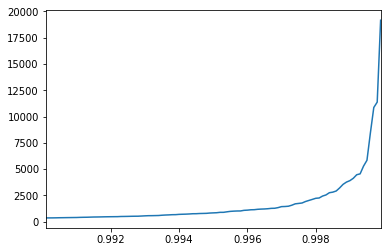

In [179]:
# Take viewers column by transposing
s = streams.T.iloc[2]

# percentiles
p = (99 + np.array(range(1, 100)) / 100) / 100
# Plot
s.quantile(p).plot()
plt.show()